## Importing Libraries

In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

from xgboost import XGBClassifier


from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

import pickle

# import warnings
# warnings.filterwarnings("ignore")

## Data Exploration

In [227]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
dataset = pd.concat(objs = [train_data, test_data], axis = 0)

In [228]:
dataset.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


## Data Analysis

In [249]:
def plot_histogram(feature):
    plt.hist(dataset[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(feature))
    plt.show()

In [238]:
numeric_features = dataset.select_dtypes(include=np.number)
numeric_features.shape

(129880, 20)

## Data Preprocessing

In [157]:
def preprocessing_dataset(df):

    df = df.copy()

    df = df.drop(columns = ['Unnamed: 0'], axis = 1)

    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

    # Binary encoding
    le = LabelEncoder()

    df['Gender'] = le.fit_transform(df['Gender'])
    df['Customer Type'] = le.fit_transform(df['Customer Type'])
    df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

    # One-hot encoding
    flight_class_dummies = pd.get_dummies(df['Class'], prefix='Flight_class')
    df = pd.concat([df, flight_class_dummies], axis=1)
    df = df.drop('Class', axis=1)

    return df

In [158]:
dataset = preprocessing_dataset(dataset)

In [13]:
dataset.head().T

,0,1,2,3,4
id,70172.0,5047.0,110028.0,24026.0,119299.0
Gender,1.0,1.0,0.0,0.0,1.0
Customer Type,0.0,1.0,0.0,0.0,0.0
Age,13.0,25.0,26.0,25.0,61.0
Type of Travel,1.0,0.0,0.0,0.0,0.0
Flight Distance,460.0,235.0,1142.0,562.0,214.0
Inflight wifi service,3.0,3.0,2.0,2.0,3.0
Departure/Arrival time convenient,4.0,2.0,2.0,5.0,3.0
Ease of Online booking,3.0,3.0,2.0,5.0,3.0
Gate location,1.0,3.0,2.0,5.0,3.0


In [160]:
X = dataset.drop(columns='satisfaction', axis=1)
y = dataset['satisfaction']

In [161]:
le = LabelEncoder()
y = le.fit_transform(y)

Splitting Data into 70% Training and 30% Testing

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [260]:
from sklearn.feature_selection import RFECV
cv_estimator = RandomForestClassifier(random_state =42)

cv_estimator.fit(X_train, y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring="accuracy")
cv_selector = cv_selector.fit(X_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = []

# print(‘Optimal number of features :’, cv_selector.n_features_)
# print(‘Best features :’, rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [265]:
for bool, feature in zip(rfecv_mask, X.columns):
    if bool:
        rfecv_features.append(feature)

In [268]:
cv_estimator.feature_importances_

array([0.02975673, 0.00391098, 0.03617904, 0.0287222 , 0.09194894,
       0.02815772, 0.14751427, 0.0137488 , 0.03539781, 0.01499321,
       0.00980923, 0.16546909, 0.04827148, 0.04845322, 0.02698748,
       0.03607394, 0.02401238, 0.02136589, 0.01925483, 0.02315568,
       0.00916882, 0.01046143, 0.07146319, 0.0536518 , 0.00207184])

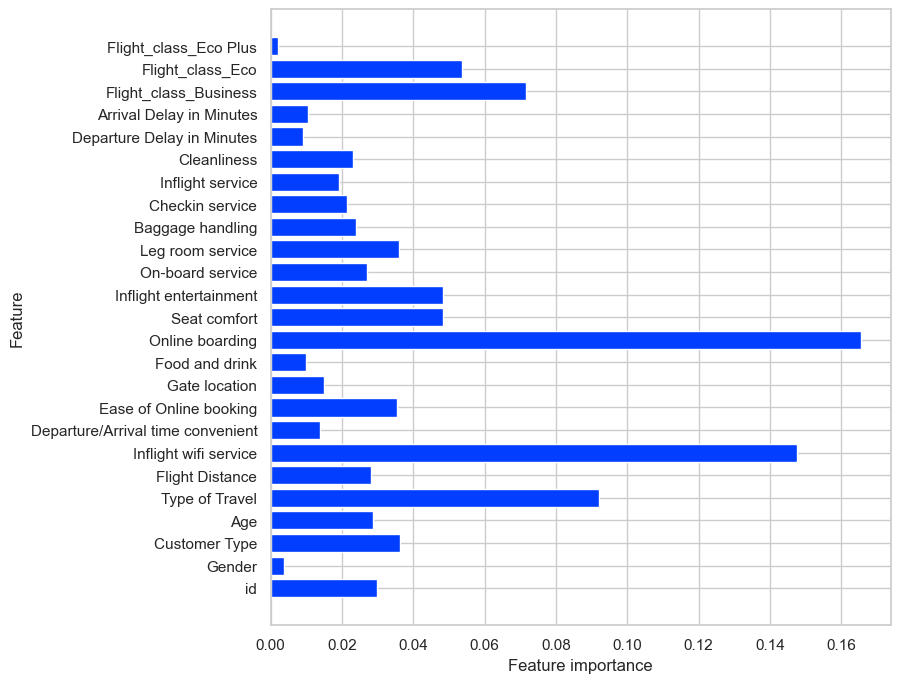

In [266]:
n_features = X.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [269]:
important_features_dict = {}
for idx, val in enumerate(cv_estimator.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: [11, 6, 4, 22, 23]


In [300]:
for i in important_features_list:
    print(X.columns[i])

In [295]:
X_new = X[['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Flight_class_Business', 'Flight_class_Eco', 'Inflight entertainment', 'Customer Type', 'Leg room service', 'Ease of Online booking']]

In [296]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [297]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_new_train)
X_new_train = scaling.transform(X_new_train)
X_new_test = scaling.transform(X_new_test)

Scaling Data

In [163]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

## LogisticRegression with GridSearchCV

In [181]:
log_r_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
}

log_r = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000),
    param_grid = log_r_param_grid,
    cv = 5,
    verbose = 1,
    scoring = 'accuracy',
    n_jobs = -1)

log_r.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [182]:
predictions_lr = log_r.predict(X_test)
print("Classification:\n{}".format(classification_report(
    y_true = le.inverse_transform(y_test),
    y_pred = le.inverse_transform(predictions_lr)
)))

Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     21979
              satisfied       0.87      0.84      0.85     16985

               accuracy                           0.88     38964
              macro avg       0.88      0.87      0.87     38964
           weighted avg       0.88      0.88      0.88     38964



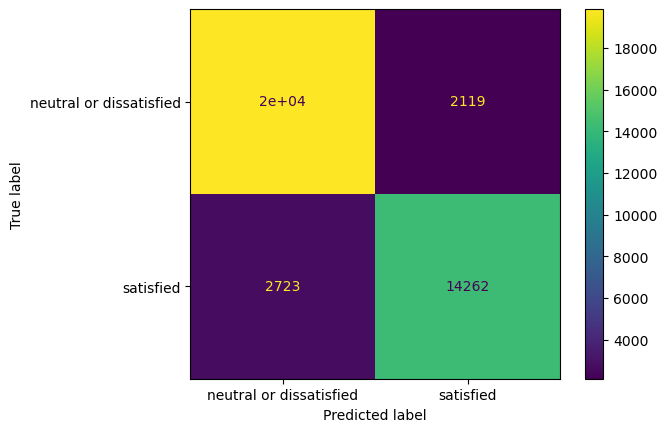

In [183]:
log_r_cf = confusion_matrix(y_true = le.inverse_transform(y_test),
                            y_pred = le.inverse_transform(predictions_lr))

cm_display = ConfusionMatrixDisplay(confusion_matrix = log_r_cf, display_labels = le.classes_)
cm_display.plot()
plt.show()

In [195]:
filename = 'log_r.sav'
pickle.dump(log_r, open(filename, 'wb'))

In [198]:
loaded_model = pickle.load(open(filename, 'rb'))

array([0, 1, 0, ..., 0, 0, 0])

## K-nearest neighbor with Grid Search CV

In [184]:
# Grid search parameters of K-nearest neighbor
knn_param_grid={"n_neighbors": [3, 5, 7], # Number of neighbors to use by default for kneighbors queries.
                "weights": ["uniform","distance"] # Weight function used in prediction.
}
knn = GridSearchCV(estimator = KNeighborsClassifier(),
                   param_grid = knn_param_grid,
                   scoring = "accuracy",
                   n_jobs = -1,
                   verbose = 1)
knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [200]:
predictions_knn = knn.predict(X_test)
print("Classification:\n{}".format(classification_report(
    y_true = le.inverse_transform(y_test),
    y_pred = le.inverse_transform(predictions_knn),
)))

Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.96      0.94     21979
              satisfied       0.95      0.88      0.92     16985

               accuracy                           0.93     38964
              macro avg       0.93      0.92      0.93     38964
           weighted avg       0.93      0.93      0.93     38964



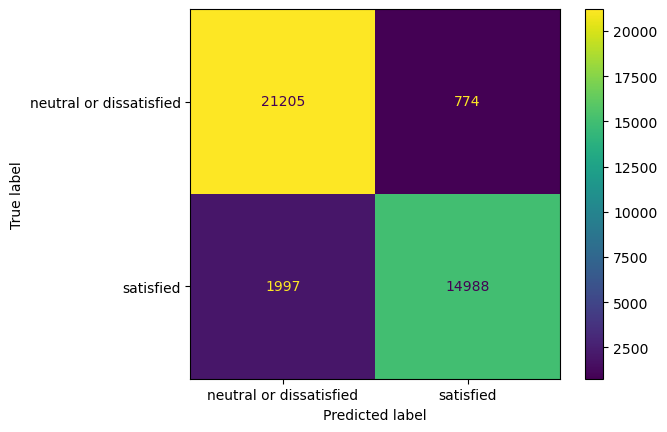

In [186]:
knn_cf = confusion_matrix(y_true = le.inverse_transform(y_test),
                          y_pred = le.inverse_transform(predictions_knn))

cm_display = ConfusionMatrixDisplay(confusion_matrix = knn_cf, display_labels = le.classes_)
cm_display.plot()
plt.show()

In [199]:
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

## Random Forest with Randomized Search CV

In [188]:
rf_parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10]
}

# define grid search
rf = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = rf_parameters_grid,
    cv = 10,
    verbose = 1,
    n_jobs = -1
)

# fit estimator
rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 15],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [2, 8],
                                        'n_estimators': [50, 100]},
                   verbose=1)

In [189]:
predictions_rf = rf.predict(X_test)
print("Classification:\n{}".format(classification_report(
    y_true = le.inverse_transform(y_test),
    y_pred = le.inverse_transform(predictions_rf),
)))

Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     21979
              satisfied       0.97      0.94      0.96     16985

               accuracy                           0.96     38964
              macro avg       0.97      0.96      0.96     38964
           weighted avg       0.96      0.96      0.96     38964



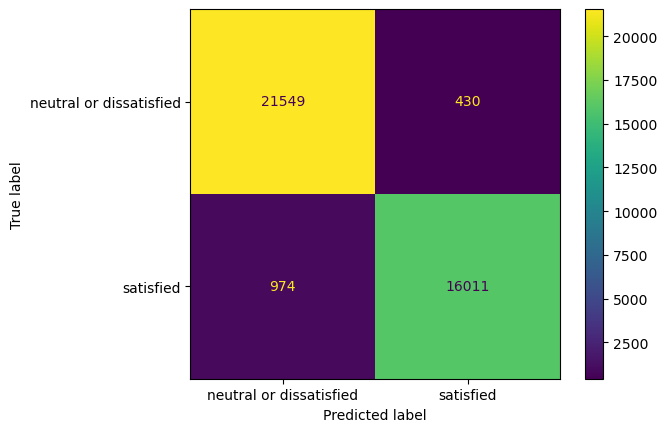

In [190]:
rf_cf = confusion_matrix(y_true = le.inverse_transform(y_test),
                          y_pred = le.inverse_transform(predictions_rf))

cm_display = ConfusionMatrixDisplay(confusion_matrix = rf_cf, display_labels = le.classes_)
cm_display.plot()
plt.show()

In [201]:
filename = 'rf_sf.sav'
pickle.dump(rf, open(filename, 'wb'))

## SVM

In [299]:
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['rbf'],
              'gamma': ['scale', 'auto']}

grid = GridSearchCV(SVC(random_state=False), param_grid, verbose = 3, cv=5, n_jobs=-1)

grid.fit(X_new_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(random_state=False), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=3)

In [294]:
pred_svm = grid.predict(X_new_test)
accuracy_score(pred_svm, y_test)

0.9131249358382096

In [301]:
filename = 'svc.sav'
pickle.dump(grid, open(filename, 'wb'))

## RF with RS

In [71]:
rf = RandomForestClassifier()

parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10]
}

# define grid search
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=parameters_grid, cv=10, n_jobs=-1)

# fit estimator
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 15],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [2, 8],
                                        'n_estimators': [50, 100]})

In [72]:
pred_rfrs = grid_search.predict(X_test)
accuracy_score(pred_rfrs, y_test)

0.9641207268247614

## MLP

In [275]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [276]:
stopping=EarlyStopping(monitor="val_loss",patience=15,restore_best_weights=True)

In [277]:
model=Sequential()

model.add(Dense(22,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
              metrics=[tf.metrics.AUC, tf.metrics.Accuracy, tf.metrics.Recall, tf.metrics.Precision, ])

TypeError: 'property' object is not iterable

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                572       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


In [78]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[stopping],epochs=500,batch_size=64,verbose=1)

Epoch 1/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1280 - val_loss: 0.1104
Epoch 2/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1246 - val_loss: 0.1091
Epoch 3/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1243 - val_loss: 0.1112
Epoch 4/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1234 - val_loss: 0.1108
Epoch 5/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1223 - val_loss: 0.1098
Epoch 6/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1219 - val_loss: 0.1108
Epoch 7/500
1421/1421 [==============================] - 9s 6ms/step - loss: 0.1208 - val_loss: 0.1107
Epoch 8/500
1421/1421 [==============================] - 8s 6ms/step - loss: 0.1206 - val_loss: 0.1082
Epoch 9/500
1421/1421 [==============================] - 8s 5ms/step - loss: 0.1175 - val_loss: 0.1082
Epoch 10/500
1421/1421 [==============================] - 8s 5ms/step - l

In [88]:
predictions = model.predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

1218/1218 [==============================] - 2s 2ms/step


In [90]:
accuracy_score(prediction_classes, y_test)

0.9576275536392568

In [93]:
confusion_matrix(prediction_classes, y_test)

array([[21548,  1220],
       [  431, 15765]])

In [208]:
path='Saved_Models/Weights'
model.save('mlp.h5')

In [95]:
print("Classification:\n{}".format(classification_report(y_test,prediction_classes)))

Classification:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21979
           1       0.97      0.93      0.95     16985

    accuracy                           0.96     38964
   macro avg       0.96      0.95      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [209]:
from keras.models import load_model

In [210]:
savedModel=load_model('mlp.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                572       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


  96/2842 [>.............................] - ETA: 4s

2022-12-05 02:41:21.157206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2842/2842 [==============================] - 5s 2ms/step


array([[1.2531085e-05],
       [1.4843642e-05],
       [2.2731204e-01],
       ...,
       [9.8897332e-01],
       [2.5338736e-01],
       [7.9388835e-02]], dtype=float32)

## DTC

In [96]:
# Grid search parameters of Decision Tree Classifier
dtc_param_grid = {"min_samples_split": range(50,500,50), # The minimum number of samples required to split an internal node
                  "max_depth": range(5,20,5) # The maximum depth of the tree.
                  }

In [97]:
dtc = DecisionTreeClassifier(random_state=0)
dtc_grid_search = GridSearchCV(dtc, param_grid=dtc_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
dtc_grid_search.fit(X_train, y_train)
print("Accuracy value on training data：", dtc_grid_search.best_score_)
best_dtc = dtc_grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy value on training data： 0.9516917014120436


In [202]:
filename = 'dtc.sav'
pickle.dump(rf, open(filename, 'wb'))

In [99]:
import seaborn as sns
import matplotlib as plt

In [103]:
adab = AdaBoostClassifier()
adab.fit(X_train, y_train)

AdaBoostClassifier()

In [106]:
sns.barplot(y = adab.feature_importances_, x = X_train.columns.values)
plt.xticks(rotation=90)
plt.title('Feature Importance Plot')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [107]:
X_train

array([[-0.25706234,  1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 0.513886  , -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 0.47446469, -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [-0.40105791, -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.19756081, -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 0.08554886,  1.        , -1.        , ..., -1.        ,
         1.        , -1.        ]])

## XGBoost

In [123]:

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
accuracy_score(pred, y_test)

/Users/shivangmedhekar/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:46:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9645056975669849

In [203]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predictions_rf = rf.predict(X_test)

In [205]:
print("Classification:\n{}".format(classification_report(y_test,predictions_rf)))

Classification:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21979
           1       0.98      0.94      0.96     16985

    accuracy                           0.96     38964
   macro avg       0.97      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



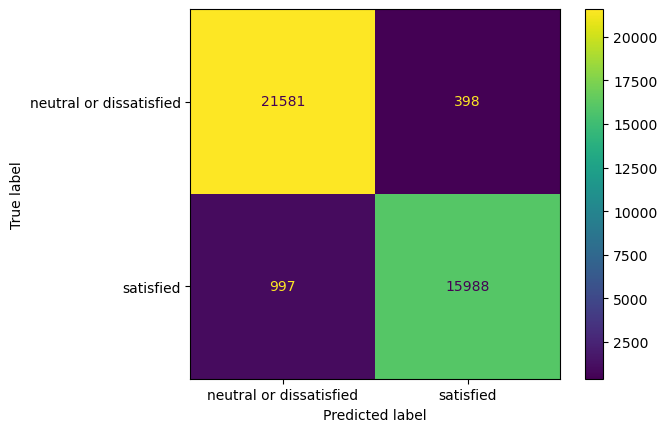

In [206]:
rf_cf = confusion_matrix(y_true = le.inverse_transform(y_test),
                         y_pred = le.inverse_transform(predictions_rf))

cm_display = ConfusionMatrixDisplay(confusion_matrix = rf_cf, display_labels = le.classes_)
cm_display.plot()
plt.show()

In [207]:
filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))